In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('HR_comma_sep.csv')
df.head(5)



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [46]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  0
since it is only 0 percent of the entire dataset the rows with missing values are excluded.


In [45]:
df.shape

(14999, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
left= df[df.left==1]

In [20]:
left.shape

(3571, 10)

In [21]:
workin=df[df.left==0]

In [22]:
workin.shape

(11428, 10)

In [30]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

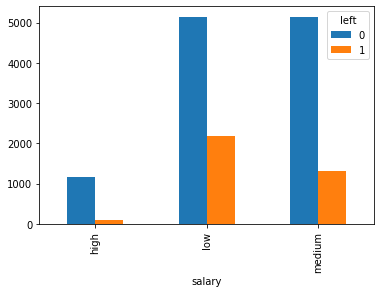

In [34]:
pd.crosstab(df.salary,df.left).plot(kind='bar');

In [44]:
fearture=df[['average_montly_hours','satisfaction_level','promotion_last_5years','salary']]
fearture.head(3)

,average_montly_hours,satisfaction_level,promotion_last_5years,salary
0,157,0.38,0,low
1,262,0.80,0,medium
2,272,0.11,0,medium


***Tackle salary dummy variable***

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. By using one hot encoding of dummy variables.

In [45]:
salary_dummies=pd.get_dummies(fearture.salary,prefix='salary')

In [47]:
fearture=pd.concat([fearture,salary_dummies],axis=1)

In [51]:
fearture.drop('salary',axis=1,inplace=True)

In [52]:
fearture.head(3)

,average_montly_hours,satisfaction_level,promotion_last_5years,salary_high,salary_low,salary_medium
0,157,0.38,0,0,1,0
1,262,0.80,0,0,0,1
2,272,0.11,0,0,0,1


In [56]:
X=fearture
y=df.left

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=2)

In [77]:
model=LogisticRegression(C=.10)

In [78]:
model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## ACCURACY

In [80]:
model.score(X_test,y_test)

0.7770666666666667

In [81]:
model.score(X_train,y_train)

0.7846919726197884

==============================================================================================================

#                                        

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# IMPORTING DATA 

In [171]:
df=pd.read_csv("framingham.csv")
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [2]:
df.drop(['education'],axis=1,inplace=True)


In [3]:
df.shape

(4240, 15)

In [4]:
df.groupby("male").mean()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,
0,49.795868,0.408678,5.729730,0.037364,0.006198,0.308264,0.023554,239.441313,133.040083,82.296694,25.510723,77.097934,81.83605,0.124380
1,49.293407,0.607692,13.368771,0.019391,0.005495,0.313736,0.028571,233.104799,131.443132,83.696978,26.185333,74.257284,82.12434,0.188462


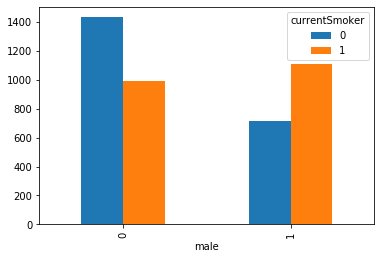

In [5]:
pd.crosstab(df.male,df.currentSmoker).plot(kind='bar');

In [6]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Exploratory Data Analysis

In [7]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [8]:
dfa=df.dropna(axis=0)

In [9]:
dfa.shape

(3751, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


0    3596
1     644
Name: TenYearCHD, dtype: int64

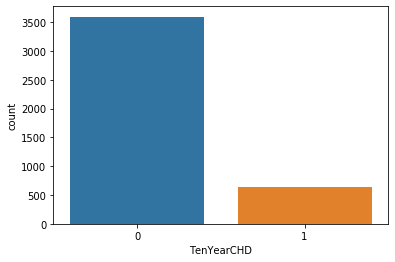

In [11]:
sns.countplot(x='TenYearCHD',data=df);
df.TenYearCHD.value_counts()

In [12]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(dfa)
df_constant.head()

,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
import statsmodels.api as sm
import scipy.stats as st

st.chisqprob = lambda chisq, dfa: st.chi2.sf(chisq, dfa)
cols=df_constant.columns[:-1]
model=sm.Logit(dfa.TenYearCHD,df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.1170
Time:                        02:01:23   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
male                0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by running the regression repeatedly until all attributes have P Values less than 0.05.

In [14]:

# ===============================================================================
# def back_feature_elem (data_frame,dep_var,col_list):
#     """ Takes in the dataframe, the dependent variable and a list of column names,
#     #runs the regression repeatedly eleminating feature with the highest
#     P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

#     while len(col_list)>0 :
#         model=sm.Logit(dep_var,data_frame[col_list])
#         result=model.fit(disp=0)
#         largest_pvalue=round(result.pvalues,3).nlargest(1)
#         if largest_pvalue[0]<(0.05):
#             return result
#             break
#         else:
#             col_list=col_list.drop(largest_pvalue.index)

# result=back_feature_elem(df_constant,df.TenYearCHD,cols)
#===================================================================================
import statsmodels.api as sm
modelaa=sm.Logit(dfa.TenYearCHD,dfa.iloc[:,:-1])
resulta=modelaa.fit();
resulta.summary()
resulta=model.fit(disp=0)
largest_pvalues=round(resulta.pvalues,3).nlargest(1)
# largest_pvalue=round(result .pvalues,3).nlargest(1)
largest_pvalues


Optimization terminated successfully.
         Current function value: 0.400050
         Iterations 6


diabetes    0.994
dtype: float64

In [15]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(dfa)
heart_df_constant.head()

,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:

st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
modelaaa=sm.Logit(dfa.TenYearCHD,heart_df_constant[cols])
result=modelaaa.fit();
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.1170
Time:                        02:01:23   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
male                0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [17]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        modelaa=sm.Logit(dep_var,data_frame[col_list])
        result=modelaa.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

resultq=back_feature_elem(heart_df_constant,dfa.TenYearCHD,cols)

In [18]:
resultq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.1149
Time:                        02:01:23   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
male           0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

In [19]:
params = np.exp(resultq.params)
conf = np.exp(resultq.conf_int())
conf['OR'] = params
pvalue=round(resultq.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000272    0.000109   0.000
male            1.455242       2.198536    1.788687   0.000
age             1.054483       1.080969    1.067644   0.000
cigsPerDay      1.011733       1.028128    1.019897   0.000
totChol         1.000158       1.004394    1.002273   0.035
sysBP           1.013292       1.021784    1.017529   0.000
glucose         1.004346       1.010898    1.007617   0.000


# FITTING MODEL

In [20]:
from sklearn.model_selection import train_test_split
X=

In [138]:
features = heart_df_constant[['male','age','cigsPerDay','totChol','sysBP','TenYearCHD']]
X = features.iloc[:,:-1]
y=features.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=.4)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
logrega=LogisticRegression(C=1e-3)

# MODEL EVALUATION

In [141]:
logrega.fit(X_train,y_train)
y_pred=logrega.predict(X_test)
y_pred_train=logrega.predict(X_train)



##  1.( FINDING ACCURACY )

In [143]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.8640906062624917

##  2.(CONFUSION MATRIX)

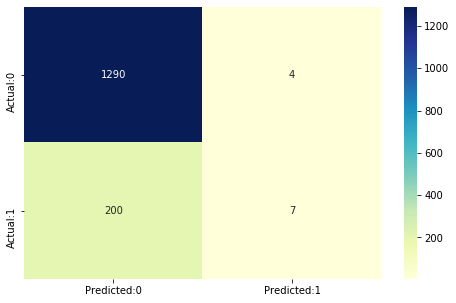

In [146]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

 FROM CONFUSION MATRIX WE WATCHES THAT WE HAVE 1290+7=1297 CORRECT PREDICTIONS AND
 200+4=204 FALSE PREDICTIONS

In [147]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [156]:
(sensitivity+specificity)

1.0307252350125813

##  3.Model Evaluation - STATISTICS

In [157]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8640906062624917 
 The Missclassification = 1-Accuracy =  0.13590939373750832 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.033816425120772944 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9969088098918083 
 Positive Predictive value = TP/(TP+FP) =  0.6363636363636364 
 Negative predictive Value = TN/(TN+FN) =  0.8657718120805369 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  10.939613526569886 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.969179492940868


#### Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5

In [160]:
y_pred_prob=logrega.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.900357,0.099643
1,0.952619,0.047381
2,0.737161,0.262839
3,0.752016,0.247984
4,0.901622,0.098378


# Lower the threshold

Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered

In [163]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logrega.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],
           'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),
           'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[524 770]
 [ 24 183]] 
 with 707 correct predictions and 24 Type II errors( False Negatives) 

 Sensitivity:  0.8840579710144928 Specificity:  0.40494590417310666 



With 0.2 threshold the Confusion Matrix is  
 [[974 320]
 [ 88 119]] 
 with 1093 correct predictions and 88 Type II errors( False Negatives) 

 Sensitivity:  0.5748792270531401 Specificity:  0.7527047913446677 



With 0.3 threshold the Confusion Matrix is  
 [[1183  111]
 [ 154   53]] 
 with 1236 correct predictions and 154 Type II errors( False Negatives) 

 Sensitivity:  0.2560386473429952 Specificity:  0.9142194744976816 



With 0.4 threshold the Confusion Matrix is  
 [[1268   26]
 [ 188   19]] 
 with 1287 correct predictions and 188 Type II errors( False Negatives) 

 Sensitivity:  0.09178743961352658 Specificity:  0.9799072642967542 





#  4.ROC CURVE

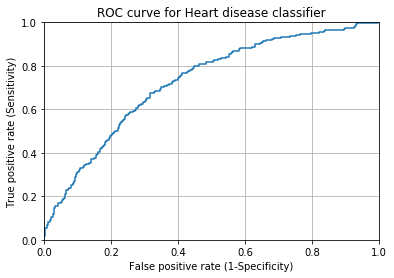

In [166]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

#  5.Area Under The Curve (AUC)
The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

In [170]:
from sklearn.metrics import roc_auc_score
roc_auc_score=roc_auc_score(y_test,y_pred_prob_yes[:,1])
roc_auc_score

0.7253806121153746